# Title

## Introduction
Background: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

Question(s): clearly state the question you tried to answer with your project. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear.

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 

Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
performs the data analysis. For your analysis, you should think about and provide a brief explanation of the following questions:
Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How did you compare and select the model?
Note: you should also think about the following:
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis 
note: all figures should have a figure number and a legend

Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

In [8]:
library(tidyverse)
library(repr)
library(dplyr)

In [21]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Wrangles and cleans

In [23]:
minecraft <- players |>
    mutate(experience = as_factor(experience)) |>
    select(experience, played_hours, Age)
minecraft

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17
Regular,0.0,19
Amateur,0.0,21
Amateur,0.1,17


Summary

In [53]:
play_time <- minecraft |>
    group_by(experience) |>
    summarize(average_play = mean(played_hours), highest = max(played_hours), lowest = min(played_hours))
play_time

age_group <- minecraft |>
    group_by(experience) |>
    summarize(average_age = mean(Age, na.rm = TRUE), oldest = max(Age, na.rm = TRUE), youngest = min(Age, na.rm = TRUE))
age_group

aggregate <- minecraft |>
    summarize(average_age = mean(Age, na.rm = TRUE), oldest = max(Age, na.rm = TRUE), youngest = min(Age, na.rm = TRUE), average_play = mean(played_hours), highest = max(played_hours), lowest = min(played_hours))
aggregate

experience,average_play,highest,lowest
<fct>,<dbl>,<dbl>,<dbl>
Pro,2.6000000,30.3,0
Veteran,0.6479167,12.5,0
Amateur,6.0174603,150.0,0
Regular,18.2083333,223.1,0
Beginner,1.2485714,23.7,0


experience,average_age,oldest,youngest
<fct>,<dbl>,<dbl>,<dbl>
Pro,16.92308,25,9
Veteran,20.95833,46,16
Amateur,20.25397,45,11
Regular,20.60000,50,8
Beginner,21.65714,42,17


average_age,oldest,youngest,average_play,highest,lowest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,50,8,5.845918,223.1,0


Visulization

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


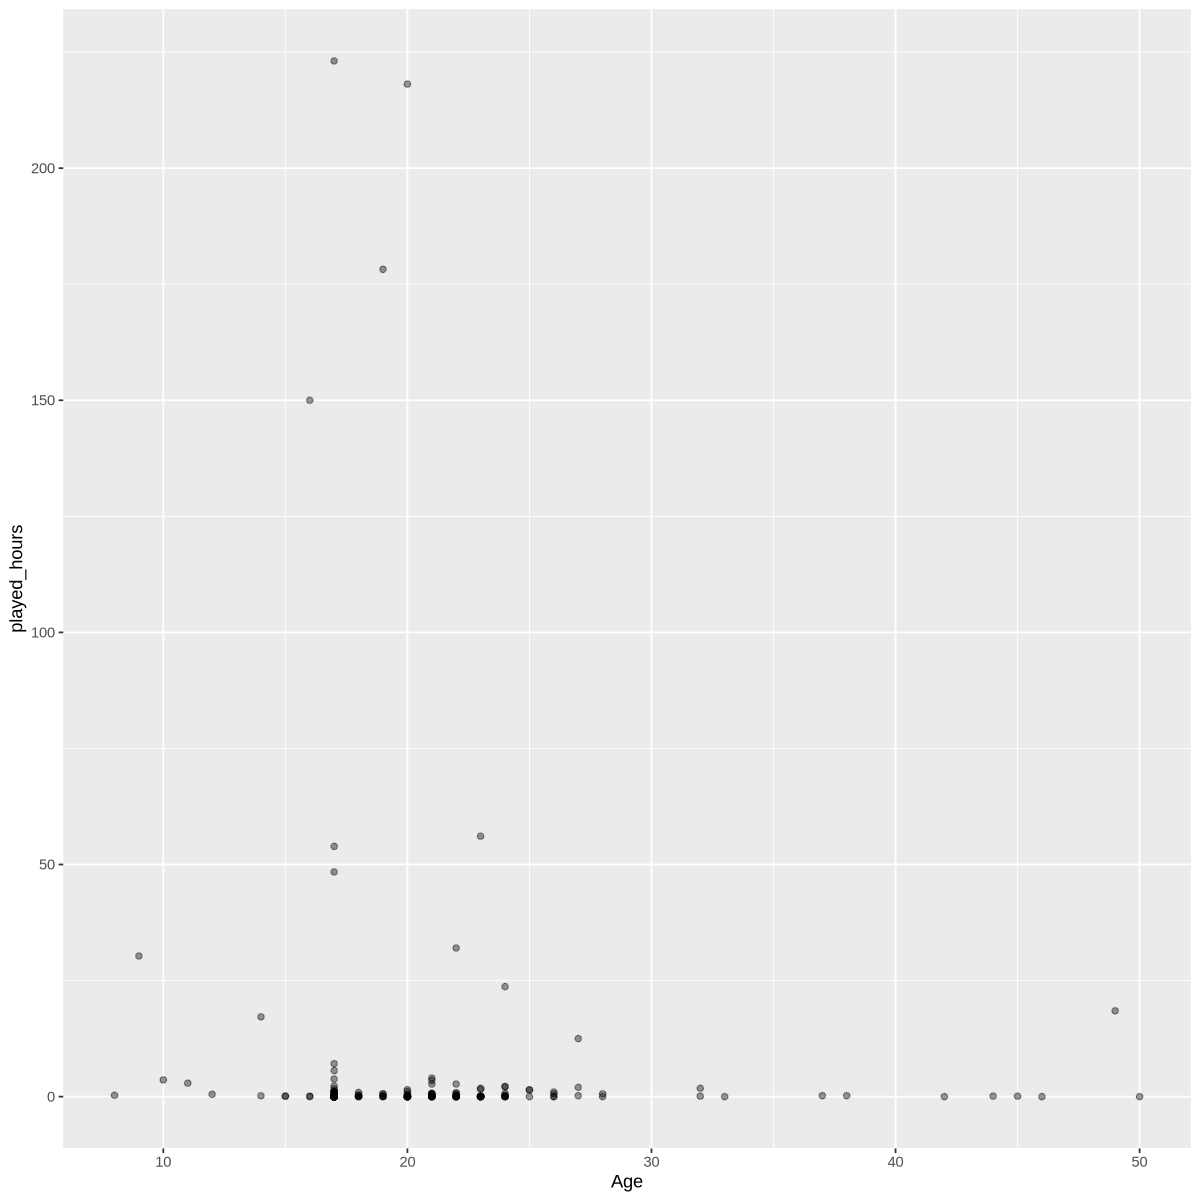

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


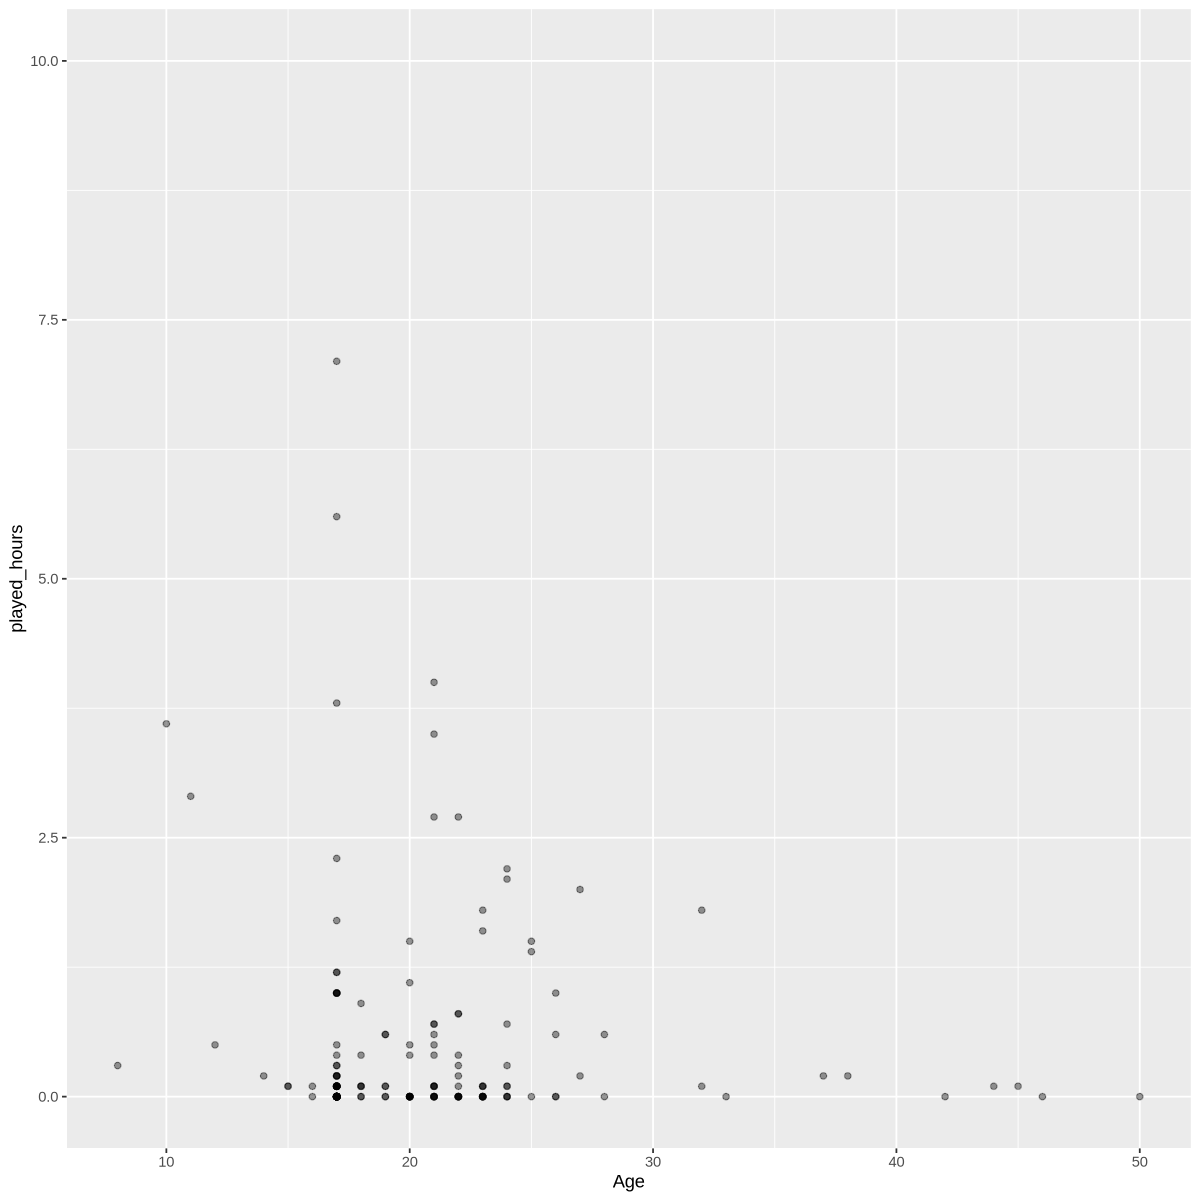

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


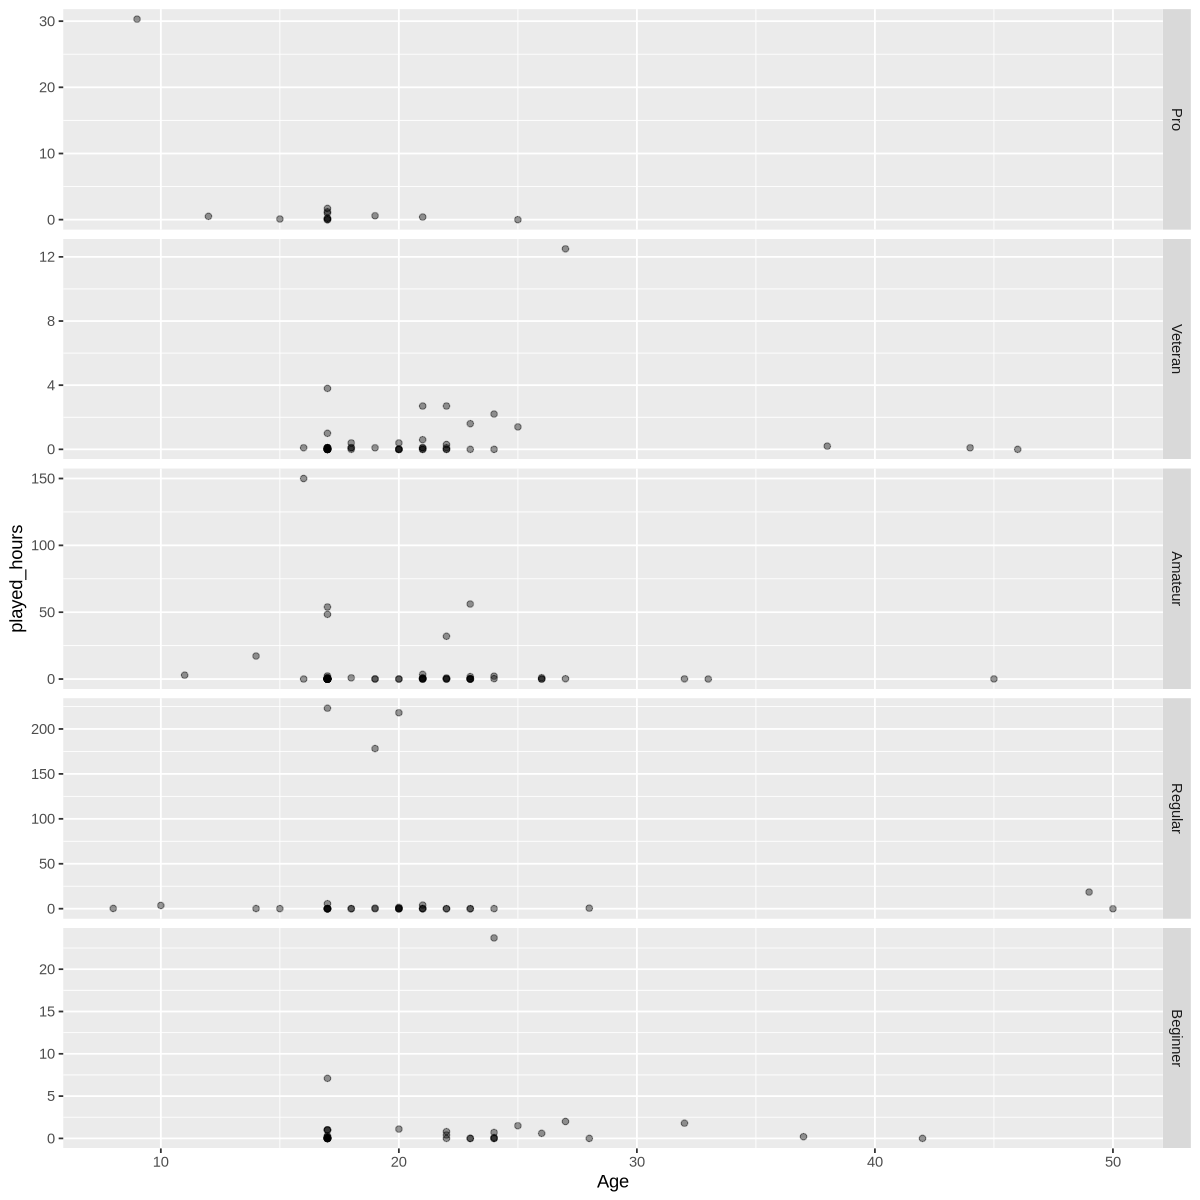

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


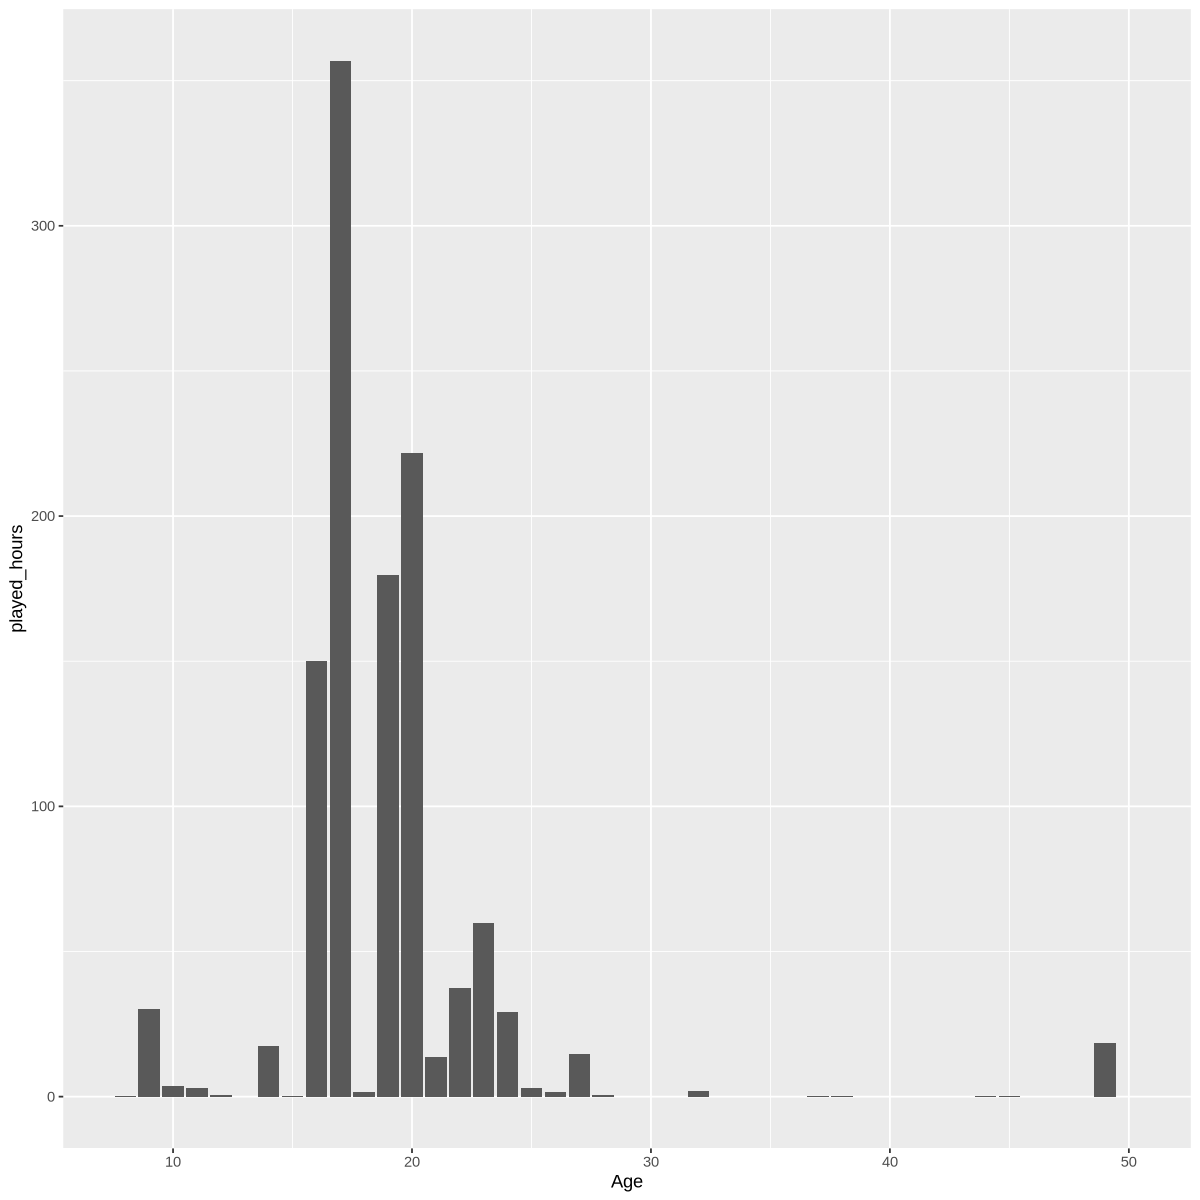

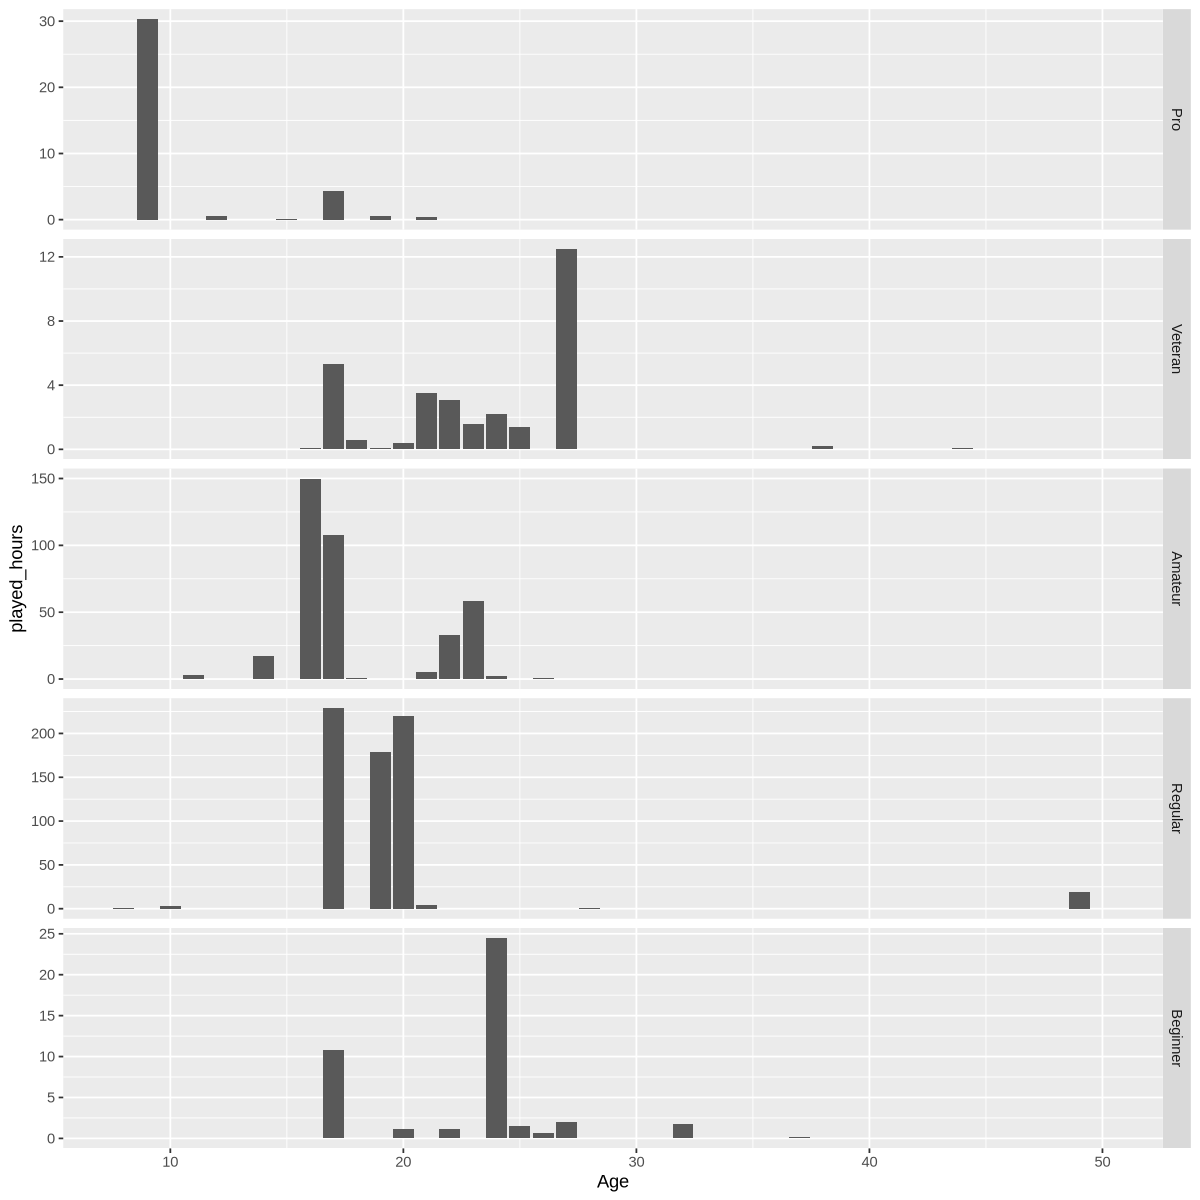

In [61]:
scaled_points <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha= 0.4)
scaled_points

options(repr.plot.width = 10, repr.plot.height = 10)
points <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha= 0.4) +
    scale_y_continuous(limits = c(0, 10))
points

scaled_points <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha= 0.4) +
    facet_grid(rows = "experience", scale = "free_y")
scaled_points

graph <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_bar(stat = "identity", )
graph

group_graph <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_bar(stat = "identity") +
    facet_grid(rows = "experience", scales = "free_y")
group_graph